In [2]:
%matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2
#from archivalCGMtools.loc4.comaSlice import comaSlice
# from archivalCGMtools.loc4 import slime
# from archivalCGMtools.loc4 import slimeAnalysis
# from archivalCGMtools.loc4 import viz
from pyslime import slime
from pyslime import utils as pu
import glob

from astropy.table import Table, vstack

from scipy import stats as sstats
import numpy as np

import pickle
from importlib import reload
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as sstats
from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import z_at_value
import astropy.units as u


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times'
plt.rcParams['mathtext.fontset'] = 'stix'

plt.rcParams['font.size'] = 16

see `/Users/mwilde/Dropbox/slime-mold/final_code/verify-stacking-in-final-vac-table.ipynb`

In [3]:
vacfile = "/Users/mwilde/Desktop/slimeMold_galaxy_catalog_v1_0_0.fits"
vac = Table.read(vacfile)
vac

catalogID,plate,mjd,fiberid,ra,dec,z,massSource,mcpmRun,mstars,matterDens
int64,int32,int32,int32,float64,float64,float32,bool,int16,float32,float32
26651630147,266,51630,147,146.29986258871986,-0.1200040329025857,0.030703507,True,0,10.425013,1.4974102
266516301,266,51630,1,146.714215072841,-1.041280023331374,0.021222278,True,0,10.172931,1.7854924
2665163012,266,51630,12,146.9634997327016,-0.5447758299302171,0.055980586,True,0,10.012631,0.8528137
2665163069,266,51630,69,146.8915925363065,-0.5126719548057409,0.08389291,True,0,10.379661,0.72258246
2665163083,266,51630,83,146.0937040634269,-0.793110365699979,0.06758517,True,0,10.851116,0.98676234
26651630373,266,51630,373,145.79337611029078,1.185684949627377,0.06256682,True,0,10.554297,0.49502164
2665163078,266,51630,78,146.7560335057309,-0.1682299117202801,0.062449906,True,0,9.977581,1.092552
26651630412,266,51630,412,145.96965802752655,0.8309221318276753,0.03635695,True,0,10.113277,1.608144
26651630221,266,51630,221,145.7447381357765,-0.0763446750654876,0.06259136,True,0,10.18631,1.1111013


In [4]:
vacfile = "/Users/mwilde/Desktop/slimeMold_galaxy_catalog_v1_0_0.fits"
vac = Table.read(vacfile)
vac['Z'] = vac['z']
vac['MCPM_RUN'] = vac['mcpmRun']

vac['lumdist'] = cosmo.luminosity_distance(vac['z'])
lrg_slice1 = vac[vac['MCPM_RUN'] == 1]
lrg_slice2 = vac[vac['MCPM_RUN'] == 3]
lrg_slice3 = vac[vac['MCPM_RUN'] == 5]
lrg_slice4 = vac[vac['MCPM_RUN'] == 7]

lrg_slice5 = vac[vac['MCPM_RUN'] == 2]
lrg_slice6 = vac[vac['MCPM_RUN'] == 4]
lrg_slice7 = vac[vac['MCPM_RUN'] == 6]
lrg_slice8 = vac[vac['MCPM_RUN'] == 8]
sdss = vac[vac['MCPM_RUN'] == 0]
vac

catalogID,plate,mjd,fiberid,ra,dec,z,massSource,mcpmRun,mstars,matterDens,Z,MCPM_RUN,lumdist
,,,,,,,,,,,,,Mpc
int64,int32,int32,int32,float64,float64,float32,bool,int16,float32,float32,float32,int16,float64
26651630147,266,51630,147,146.29986258871986,-0.1200040329025857,0.030703507,True,0,10.425013,1.4974102,0.030703507,0,139.05197287851993
266516301,266,51630,1,146.714215072841,-1.041280023331374,0.021222278,True,0,10.172931,1.7854924,0.021222278,0,95.44153458122074
2665163012,266,51630,12,146.9634997327016,-0.5447758299302171,0.055980586,True,0,10.012631,0.8528137,0.055980586,0,258.18859836352
2665163069,266,51630,69,146.8915925363065,-0.5126719548057409,0.08389291,True,0,10.379661,0.72258246,0.08389291,0,394.48340484247876
2665163083,266,51630,83,146.0937040634269,-0.793110365699979,0.06758517,True,0,10.851116,0.98676234,0.06758517,0,314.2579096752821
26651630373,266,51630,373,145.79337611029078,1.185684949627377,0.06256682,True,0,10.554297,0.49502164,0.06256682,0,289.9061034568629
2665163078,266,51630,78,146.7560335057309,-0.1682299117202801,0.062449906,True,0,9.977581,1.092552,0.062449906,0,289.3407120545514
26651630412,266,51630,412,145.96965802752655,0.8309221318276753,0.03635695,True,0,10.113277,1.608144,0.03635695,0,165.3374885325381


In [5]:
print(f"{lrg_slice1['Z'].min()} ({lrg_slice1['lumdist'].min()}), {lrg_slice1['Z'].max()}, ({lrg_slice1['lumdist'].max()})")
print(lrg_slice2['Z'].min(),lrg_slice2['Z'].max(), lrg_slice2['lumdist'].min(), lrg_slice2['lumdist'].max())
print(lrg_slice3['Z'].min(),lrg_slice3['Z'].max(), lrg_slice3['lumdist'].min(), lrg_slice3['lumdist'].max())
print(lrg_slice4['Z'].min(), lrg_slice4['Z'].max(), lrg_slice4['lumdist'].min(), lrg_slice4['lumdist'].max())

0.00021190333063714206 (0.9379593220923801), 0.19797267019748688, (999.9941029895903)
0.18006073 0.29977584 900.0166412817996 1599.9978819104106
0.28340578 0.37878844 1500.023551748191 2099.987769896093
0.36333567 0.5114972 2000.0045391076121 2998.9142079085764


In [6]:
import scipy

# need to interpolate to get back z from lumdist so the secax can call a function
z_vals = np.linspace(-0.00001, 0.7, 10000)
lum_dist_vals = cosmo.luminosity_distance(z_vals).value
interpolator_instance = scipy.interpolate.interp1d(lum_dist_vals, z_vals, 
                                                   fill_value=0.0001, 
                                                   bounds_error=False)
z_from_lumdist = lambda lum_dist: interpolator_instance(lum_dist)

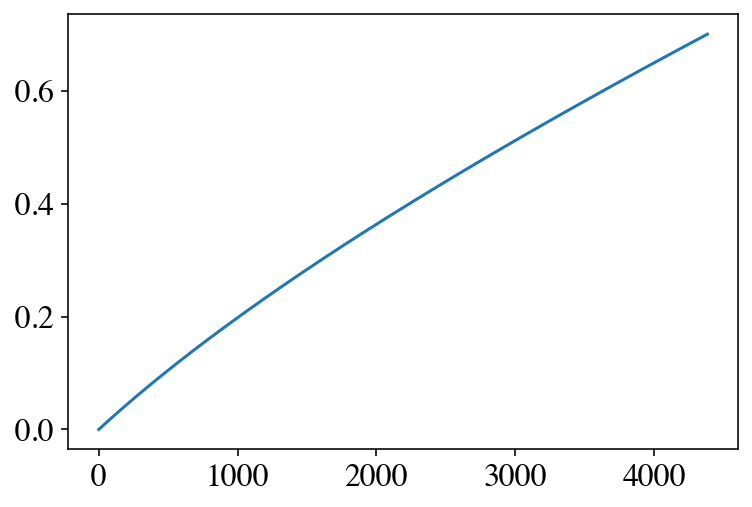

In [7]:
plt.plot(lum_dist_vals, z_from_lumdist(lum_dist_vals));

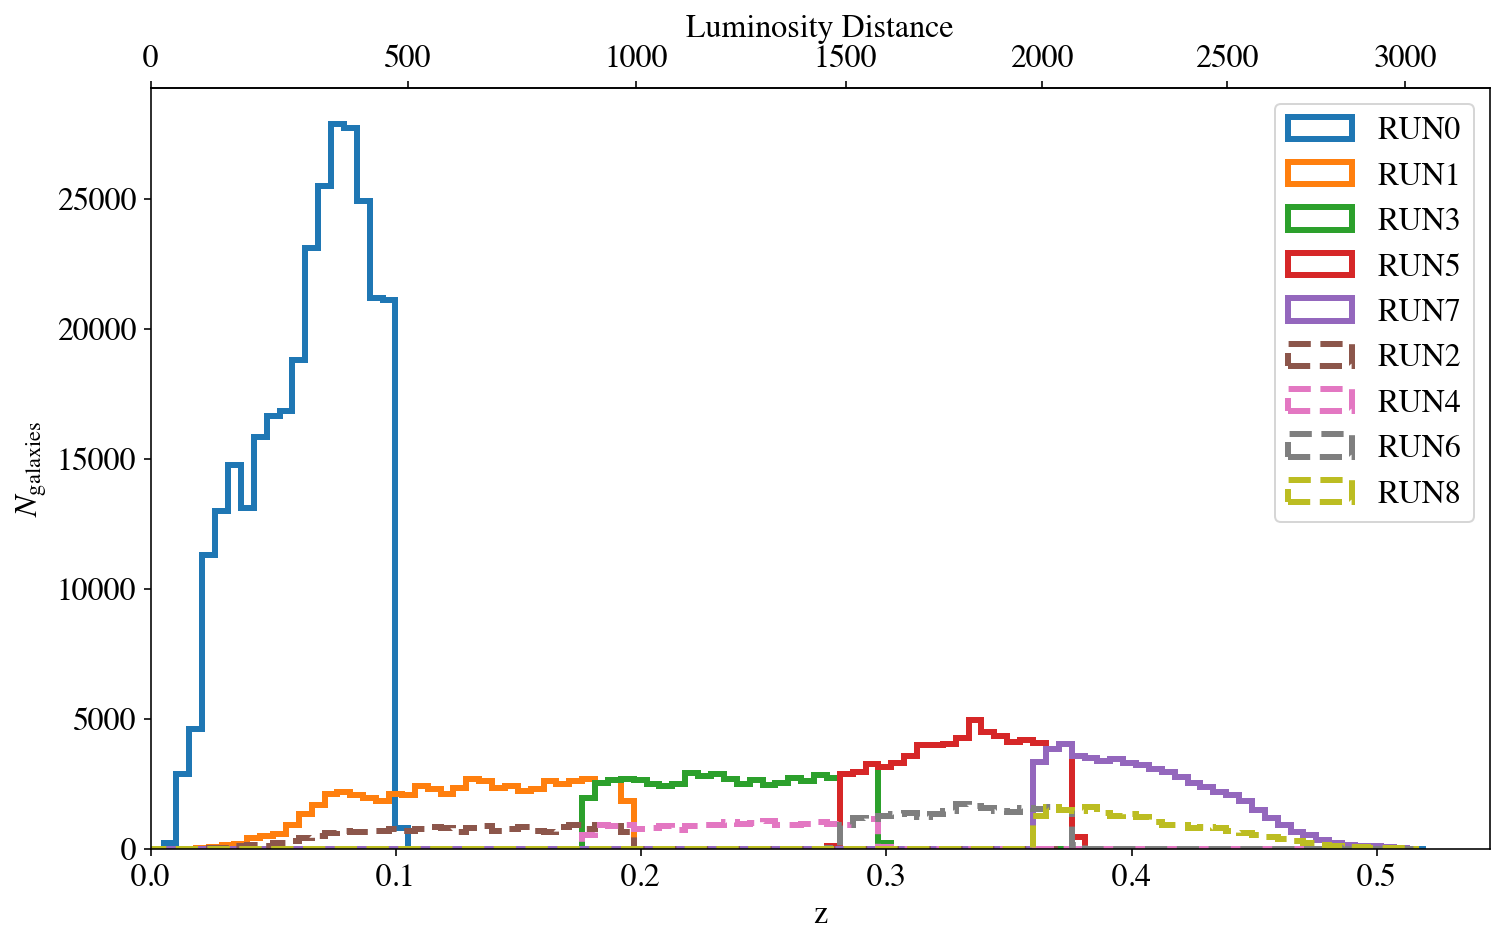

In [8]:
fig, ax = plt.subplots(figsize=(12,7))


align = 'left'
bins = np.linspace(0, 0.52, 100)

lw=3

plt.hist(sdss['Z'], histtype='step', bins=bins, lw=lw, label='RUN0')
ax.hist(lrg_slice1['Z'], histtype='step', bins=bins, align=align, label='RUN1',lw=lw)
ax.hist(lrg_slice2['Z'], histtype='step', bins=bins, align=align, label='RUN3',lw=lw);
ax.hist(lrg_slice3['Z'], histtype='step', bins=bins, align=align, label='RUN5',lw=lw);
ax.hist(lrg_slice4['Z'], histtype='step', bins=bins, align=align, label='RUN7',lw=lw);
ax.hist(lrg_slice5['Z'], histtype='step', bins=bins, align=align, label='RUN2',lw=lw, ls='--')
ax.hist(lrg_slice6['Z'], histtype='step', bins=bins, align=align, label='RUN4',lw=lw, ls='--');
ax.hist(lrg_slice7['Z'], histtype='step', bins=bins, align=align, label='RUN6',lw=lw, ls='--');
ax.hist(lrg_slice8['Z'], histtype='step', bins=bins, align=align, label='RUN8',lw=lw, ls='--');


# which_cap = "All"
# ax.text(0.1, 0.8, s=which_cap, transform=ax.transAxes)

# ax.set_yscale('log')
ax.set_xlabel('z')
ax.set_xlim(0)
ax.set_ylabel(r'$N_{\rm galaxies}$')
ax.legend()

def lumdist(z_vals):
    lumdist = cosmo.luminosity_distance(z_vals).value
    return lumdist
secax = ax.secondary_xaxis('top', functions=(lumdist, z_from_lumdist))
secax.set_xlabel('Luminosity Distance');
plt.savefig('../figures/histogram_all.png')

plt.show();

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.colors as colors

In [10]:
df = vac.to_pandas()

In [11]:
df.query('mcpmRun == 0').z

0         0.030704
1         0.021222
2         0.055981
3         0.083893
4         0.067585
            ...   
300125    0.090610
300126    0.080384
638783    0.012527
638804    0.075068
638819    0.033398
Name: z, Length: 300130, dtype: float32

In [12]:
x = df.query('mcpmRun == 0').z.to_numpy()

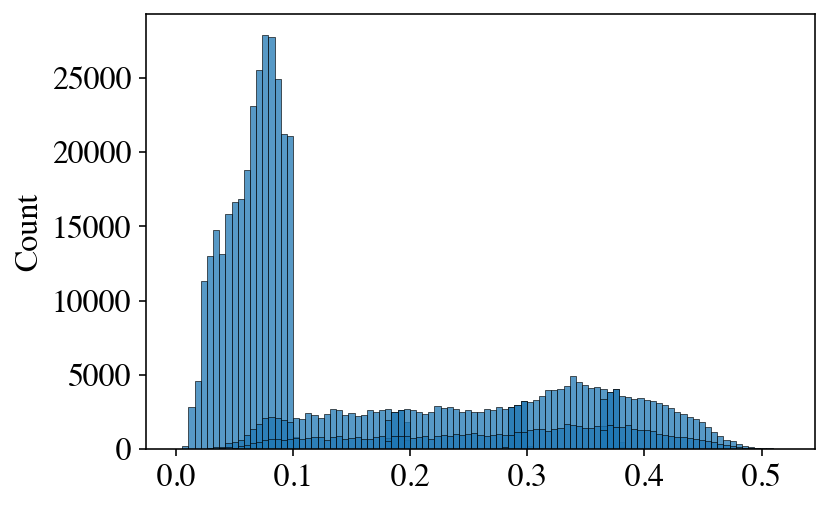

In [29]:
for i in range(0, 9):
    x = df.query(f'mcpmRun == {i}').z.to_numpy()
    sns.histplot(x=x, bins=bins)

In [20]:
sns.histplot?

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
disrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mass